In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('insurance.csv')
#this function will provide the descriptive statistics of the dataset.(only int value)
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


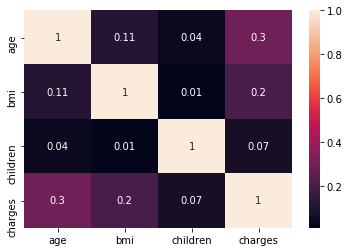

In [3]:
#There are 4 independent variables and 1 dependent variable. So we need to see what is needed most importantly using the Correlation Matrix.
import seaborn as sns
#Other methods like Back Propagation/ Forward Propagation can be used. But Correlation Matrix is best for most speedy analysis.
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [4]:
#determine X and y variables(form correlation matrix we take age and bmi and we take gender,smokering values as independent variables)
X = dataset.iloc[:, [0,1,2,4]].values
y = dataset.iloc[:, [-1]].values


In [5]:
#label encoding for character data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
labelencoder1 = LabelEncoder()
X[:, -1] = labelencoder1.fit_transform(X[:, -1])

In [6]:
#converting X to poly degree of 3.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X = poly_reg.fit_transform(X)

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [8]:
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [9]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha =0.01, random_state = 0, learning_rate = 'invscaling' , eta0 = 0.0001)
regressor.fit(X_train, y_train)

/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1229: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [10]:
#predicting the value
y_pred = regressor.predict(X_test)

In [11]:
#r2 result
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination = ",r_squared)

Coefficient of Determination =  0.874225780721315
